In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# Loading the data from csv file 
uberride = pd.read_csv('/Users/sachinkharche/uberrides_analysis/Data/uber-raw-data-apr14.csv',encoding='utf-8')

In [49]:
uberride.head(4)

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512


In [50]:
uberride.shape

(564516, 4)

In [51]:
uberride.duplicated().sum()

7749

In [52]:
uberride.dtypes

Date/Time     object
Lat          float64
Lon          float64
Base          object
dtype: object

In [53]:
uberride.drop_duplicates(inplace=True)

In [54]:
uberride['Date/Time']=pd.to_datetime(uberride['Date/Time'],format='%m/%d/%Y %H:%M:%S')

In [55]:
uberride['Date/Time'].dtype

dtype('<M8[ns]')

In [57]:
uberride['Month']=uberride['Date/Time'].dt.month

<AxesSubplot:>

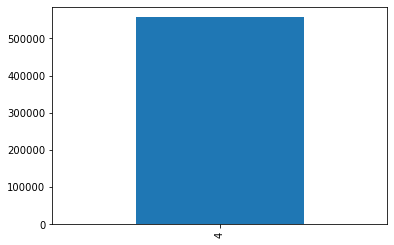

In [58]:
uberride['Month'].value_counts().plot(kind='bar')

In [59]:
uberride['weekday']=uberride['Date/Time'].dt.day_name()
uberride['Day']=uberride['Date/Time'].dt.day
uberride['Hour']=uberride['Date/Time'].dt.hour
uberride['Month']=uberride['Date/Time'].dt.month
uberride['Minute']=uberride['Date/Time'].dt.minute

In [92]:
uberride.head(4)

,Date/Time,Lat,Lon,Base,Month,weekday,Day,Hour,Minute
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,4,Tuesday,1,0,11
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,4,Tuesday,1,0,17
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,4,Tuesday,1,0,21
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,4,Tuesday,1,0,28


In [103]:
temp=uberride.groupby(['Month','weekday']).size()
temp.head(6)

Month  weekday 
4      Friday      88985
       Monday      60075
       Saturday    76152
       Sunday      50524
       Thursday    83954
       Tuesday     89957
dtype: int64

In [104]:
temp=uberride.groupby(['Month','weekday'],as_index=False).size()
temp.head(6)

,Month,weekday,size
0,4,Friday,88985
1,4,Monday,60075
2,4,Saturday,76152
3,4,Sunday,50524
4,4,Thursday,83954
5,4,Tuesday,89957


In [114]:
temp['Month'].unique()

array([4])

In [121]:
temp['weekday'].unique()
temp['weekday']

0       Friday
1       Monday
2     Saturday
3       Sunday
4     Thursday
5      Tuesday
6    Wednesday
Name: weekday, dtype: object

In [122]:
dict_wk={1:'Sunday', 2:'Monday', 3:'Tuesday', 4:'Wednesday', 5:'Thursday', 6:'Friday', 7:'Saturday'}
dict_wk

{1: 'Sunday',
 2: 'Monday',
 3: 'Tuesday',
 4: 'Wednesday',
 5: 'Thursday',
 6: 'Friday',
 7: 'Saturday'}

In [125]:
temp['weekday']

0       Friday
1       Monday
2     Saturday
3       Sunday
4     Thursday
5      Tuesday
6    Wednesday
Name: weekday, dtype: object

In [126]:
temp

,Month,weekday,size
0,4,Friday,88985
1,4,Monday,60075
2,4,Saturday,76152
3,4,Sunday,50524
4,4,Thursday,83954
5,4,Tuesday,89957
6,4,Wednesday,107120


<AxesSubplot:xlabel='Month', ylabel='size'>

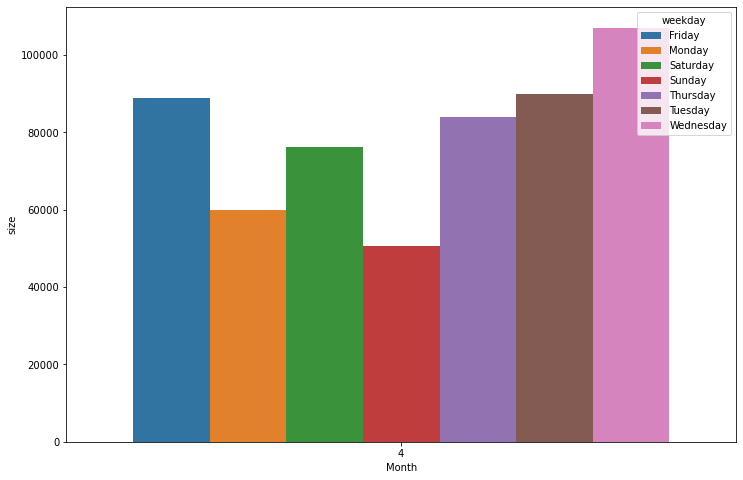

In [134]:
#To zoom in the chart
plt.figure(figsize=(12,8))
#plot the bar chart
sns.barplot(x='Month',y='size',hue='weekday',data=temp)